In [1]:
#necessary Libraries
import numpy as np
import pandas as pd
import time
import pprint

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# magic word for producing visualizations in notebook
%matplotlib inline

#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix

#Models
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Scoring Metrics
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import accuracy_score

In [4]:
# Load the dataset
file_path = r'C:\Users\Thesis2.0\django_thesis\KNN Algorithm\ap_data_c1_c2.csv'
ap_data = pd.read_csv(file_path)

In [5]:
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = ap_data.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 9
Number of rows: 6524


In [6]:
#check the statistics of the data per columns
ap_data.describe()

,channel,signal_strength,floorid,latitude,longitude
count,6524.000000,6524.000000,6524.000000,6318.000000,6318.000000
mean,2431.911097,-70.757204,124.368179,7.065764,125.596440
std,14.959696,11.485091,55.897896,0.000051,0.000036
min,2412.000000,-104.000000,1.000000,7.065631,125.596350
25%,2417.000000,-79.000000,101.750000,7.065743,125.596413
50%,2437.000000,-71.000000,140.000000,7.065776,125.596445
75%,2442.000000,-62.000000,171.000000,7.065801,125.596469
max,2462.000000,-8.000000,202.000000,7.065841,125.596502


In [7]:
#Check the columns names
col_names = ap_data.columns.values
col_names

array(['mac_address', 'ssid', 'channel', 'source', 'signal_strength',
       'floorid', 'latitude', 'longitude', 'timestamp'], dtype=object)

In [8]:
#check for missing values
missing_values_count = ap_data.isnull().sum()
#uncomment this if you want to see the count of missing data per column
#missing_values_count

# how many total missing values do we have?
total_cells = np.product(ap_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
missing_percent = (total_missing/total_cells) * 100

print('Percent of missing data = {}%'.format(missing_percent))

Percent of missing data = 0.7016826759316029%


In [9]:
#Assess unique values per columns
unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = ap_data["ssid"].unique()
unique_channel = ap_data["channel"].unique()
unique_floorid = ap_data["floorid"].unique()

print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel : {}'.format(unique_channel))
print('Unique Floor ID : {}'.format(unique_floorid))


Unique Mac Address : ['FE:47:AD:D7:13:E2' '1E:03:B6:E0:9E:3C' 'E6:4C:39:FC:36:8B'
 '22:95:8E:C1:1D:93' '42:C3:A0:F4:4C:A4' '6A:D2:19:82:06:D2']
Unique SSID : ['C1' 'C2']
Unique Channel : [2437 2432 2447 2442 2427 2452 2422 2417 2412 2462 2457]
Unique Floor ID : [101 102 103 104 105 106 107 108 109 110 111 112 117 118 119 120 127 128
 129 130 137 138 139 140 147 148 149 150 157 158 159 160 167 168 169 170
 121 122 123 124 125 126 131 132 133 134 135 136 141 142 143 144 145 146
 151 152 153 154 155 156 161 162 163 164 165 166 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189   1   2   3   4   5
   6   7   8   9  10  11  12  13  14  15  16  17  18 113 114 115 116 190
 191 192 193 194 195 196 197 198 199 200 201 202  19  20  21  22  23  24
  25  26  27  28  29  30  31  35  44  53  62  71  72  63  78  77  68  59
  50  41  32  33  42  51  52  43  34  61  70  79  60  69  54  45  36]


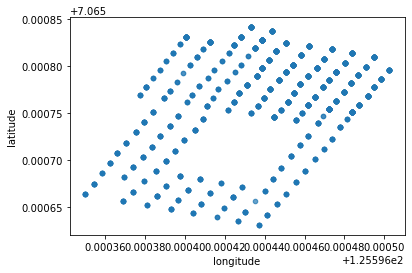

In [10]:
#Map the data i.e. see the campus
ap_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.savefig('data_map.png')

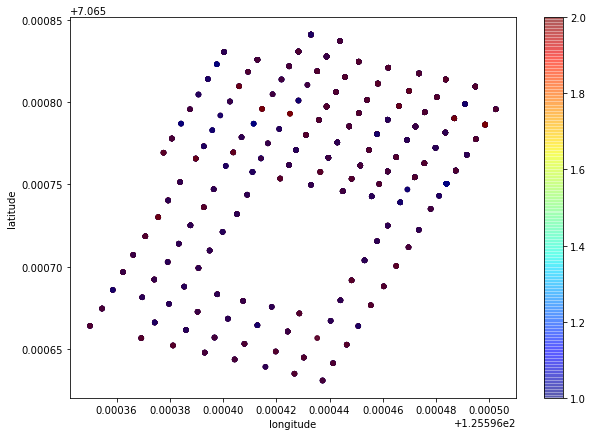

In [11]:
#map the data by user ID
#i.e. see how much of the information in each building was collected by how many users

# Assuming ap_data is your DataFrame
# Add a new column 'source_without_C' by removing 'C' from 'source'
ap_data['ssid'] = ap_data['ssid'].str.replace('C', '')

# Convert the 'source_without_C' column to numeric
ap_data['ssid'] = pd.to_numeric(ap_data['ssid'], errors='coerce')

# Add a new column 'source_without_C' by removing 'C' from 'source'
ap_data['source'] = ap_data['source'].str.replace('cap', '')

# Convert the 'source_without_C' column to numeric
ap_data['source'] = pd.to_numeric(ap_data['source'], errors='coerce')

# Plot the scatter plot using the modified 'source' values
ap_data.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    figsize=(10, 7),
    c=ap_data['ssid'],  # Use the modified 'source' values
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    sharex=False
)

plt.savefig('user_map2.png')

<AxesSubplot:>

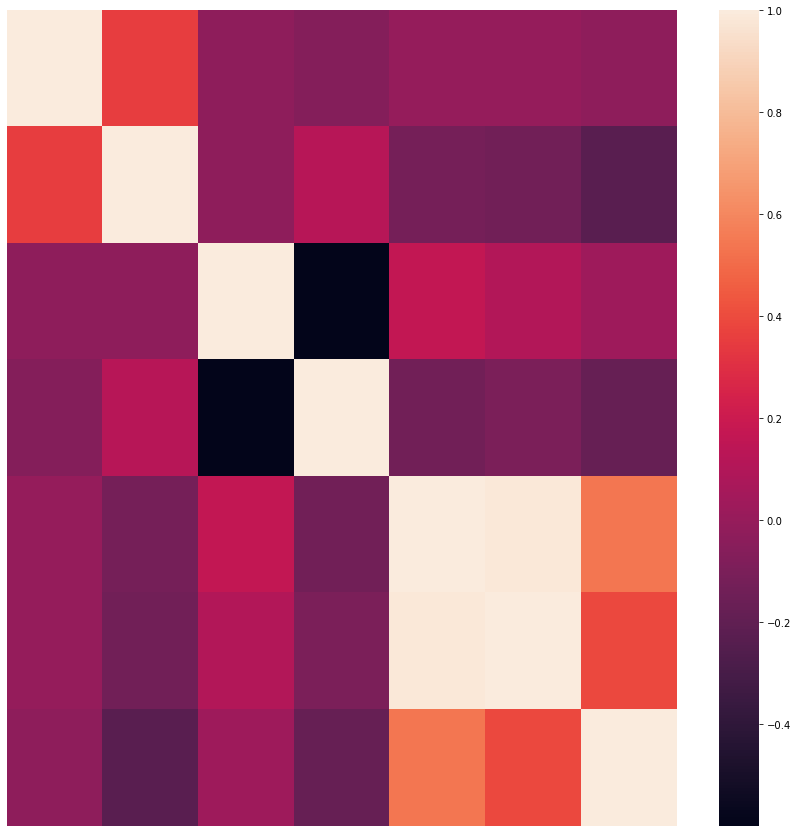

In [12]:
# plot the correlations between the WAP features
corr_matrix = ap_data.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,xticklabels=False, yticklabels=False)

In [13]:
print(ap_data)

            mac_address  ssid  channel  source  signal_strength  floorid  \
0     FE:47:AD:D7:13:E2     1     2437       1              -54      101   
1     FE:47:AD:D7:13:E2     1     2432       2              -68      101   
2     FE:47:AD:D7:13:E2     1     2437       3              -89      101   
3     FE:47:AD:D7:13:E2     1     2447       1              -61      101   
4     FE:47:AD:D7:13:E2     1     2437       3              -90      101   
...                 ...   ...      ...     ...              ...      ...   
6519  FE:47:AD:D7:13:E2     1     2442       2              -51       36   
6520  6A:D2:19:82:06:D2     2     2412       1              -82       36   
6521  FE:47:AD:D7:13:E2     1     2432       1              -71       36   
6522  6A:D2:19:82:06:D2     2     2417       2              -57       36   
6523  FE:47:AD:D7:13:E2     1     2442       2              -62       36   

      latitude   longitude         timestamp  
0     7.065735  125.596478  10/11/2023 1

In [14]:
# Save the combined data to a CSV file
output_file = 'ap_data_processed_c1_c2.csv'
ap_data.to_csv(output_file, index=False)

In [125]:
# Select relevant columns
selected_columns = ['source', 'channel', 'signal_strength', 'mac_address', 'ssid', 'timestamp', 'floorid', 'latitude', 'longitude']
ap_data_selected = ap_data[selected_columns]

# Pivot the DataFrame to create separate columns for each 'cap'
ap_data_pivot = ap_data_selected.pivot_table(
    index=['mac_address', 'ssid', 'timestamp', 'floorid', 'latitude', 'longitude'],
    columns='source',
    values=['channel', 'signal_strength'],
    aggfunc='first'
).reset_index()

# Flatten the MultiIndex columns
ap_data_pivot.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in ap_data_pivot.columns]

# Rename columns for clarity
ap_data_pivot.columns = [
    'mac_address', 'ssid', 'timestamp', 'floorid', 'latitude', 'longitude',
    'cap1_channel', 'cap2_channel', 'cap3_channel',
    'cap1_signal_strength', 'cap2_signal_strength', 'cap3_signal_strength'
]

# Replace missing signal_strength values with 100
ap_data_pivot['cap1_signal_strength'].fillna(100, inplace=True)
ap_data_pivot['cap2_signal_strength'].fillna(100, inplace=True)
ap_data_pivot['cap3_signal_strength'].fillna(100, inplace=True)

# Replace missing channel values with 0
ap_data_pivot['cap1_channel'].fillna(0, inplace=True)
ap_data_pivot['cap2_channel'].fillna(0, inplace=True)
ap_data_pivot['cap3_channel'].fillna(0, inplace=True)

'''
# Remove rows if there are two zeroes in a row in the cap_channel
ap_data_pivot = ap_data_pivot[
    ~((ap_data_pivot['cap1_channel'] == 0) & (ap_data_pivot['cap2_channel'] == 0)) &
    ~((ap_data_pivot['cap1_channel'] == 0) & (ap_data_pivot['cap3_channel'] == 0)) &
    ~((ap_data_pivot['cap2_channel'] == 0) & (ap_data_pivot['cap3_channel'] == 0))
]
'''

# Save the DataFrame to a CSV file
ap_data_pivot.to_csv('ap_data_processed_c1_c2.csv', index=False)

# Print the resulting DataFrame
print(ap_data_pivot.head())


         mac_address  ssid         timestamp  floorid  latitude   longitude  \
0  1E:03:B6:E0:9E:3C     2  10/11/2023 14:45      101  7.065735  125.596478   
1  1E:03:B6:E0:9E:3C     2  10/11/2023 14:46      101  7.065735  125.596478   
2  1E:03:B6:E0:9E:3C     2  10/11/2023 14:47      101  7.065735  125.596478   
3  1E:03:B6:E0:9E:3C     2  10/11/2023 14:48      101  7.065735  125.596478   
4  1E:03:B6:E0:9E:3C     2  10/11/2023 14:49      102  7.065739  125.596467   

   cap1_channel  cap2_channel  cap3_channel  cap1_signal_strength  \
0        2442.0        2437.0        2437.0                 -67.0   
1        2437.0        2442.0           0.0                 -63.0   
2        2437.0        2437.0           0.0                 -64.0   
3        2442.0        2437.0           0.0                 -66.0   
4        2442.0        2442.0           0.0                 -60.0   

   cap2_signal_strength  cap3_signal_strength  
0                 -79.0                 -89.0  
1             

In [158]:
#Assess unique values per columns
unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = ap_data["ssid"].unique()
unique_channel = ap_data["channel"].unique()
unique_floorid = ap_data["floorid"].unique()

print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel : {}'.format(unique_channel))
print('Unique Floor ID : {}'.format(unique_floorid))


Unique Mac Address : ['FE:47:AD:D7:13:E2' '1E:03:B6:E0:9E:3C' 'E6:4C:39:FC:36:8B'
 '22:95:8E:C1:1D:93' '42:C3:A0:F4:4C:A4' '6A:D2:19:82:06:D2']
Unique SSID : [1 2]
Unique Channel : [2437 2432 2447 2442 2427 2452 2422 2417 2412 2462 2457]
Unique Floor ID : [101 102 103 104 105 106 107 108 109 110 111 112 117 118 119 120 127 128
 129 130 137 138 139 140 147 148 149 150 157 158 159 160 167 168 169 170
 121 122 123 124 125 126 131 132 133 134 135 136 141 142 143 144 145 146
 151 152 153 154 155 156 161 162 163 164 165 166 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189   1   2   3   4   5
   6   7   8   9  10  11  12  13  14  15  16  17  18 113 114 115 116 190
 191 192 193 194 195 196 197 198 199 200 201 202  19  20  21  22  23  24
  25  26  27  28  29  30  31  35  44  53  62  71  72  63  78  77  68  59
  50  41  32  33  42  51  52  43  34  61  70  79  60  69  54  45  36]


In [126]:
#Preprocess the Training Data Set //////////////////////////////////////////////////////////////////////////////////////////////

In [127]:
# Load the dataset
file_path = r'C:\Users\pc\Desktop\Thesis\Untitled Folder 1\ap_data_processed_c1_c2.csv'
trainingData = pd.read_csv(file_path)

print(trainingData)

            mac_address  ssid         timestamp  floorid  latitude  \
0     1E:03:B6:E0:9E:3C     2  10/11/2023 14:45      101  7.065735   
1     1E:03:B6:E0:9E:3C     2  10/11/2023 14:46      101  7.065735   
2     1E:03:B6:E0:9E:3C     2  10/11/2023 14:47      101  7.065735   
3     1E:03:B6:E0:9E:3C     2  10/11/2023 14:48      101  7.065735   
4     1E:03:B6:E0:9E:3C     2  10/11/2023 14:49      102  7.065739   
...                 ...   ...               ...      ...       ...   
1394  FE:47:AD:D7:13:E2     1  13/11/2023 11:39        1  7.065631   
1395  FE:47:AD:D7:13:E2     1  13/11/2023 11:41        1  7.065631   
1396  FE:47:AD:D7:13:E2     1  13/11/2023 11:54        3  7.065639   
1397  FE:47:AD:D7:13:E2     1  13/11/2023 12:17        8  7.065664   
1398  FE:47:AD:D7:13:E2     1  13/11/2023 18:52      116  7.065762   

       longitude  cap1_channel  cap2_channel  cap3_channel  \
0     125.596478        2442.0        2437.0        2437.0   
1     125.596478        2437.0     

In [128]:
def clean_data(df):
    """
    Perform feature trimming, and engineering for trainingData
    Will also be applied to validationData
    
    INPUT: trainingData DataFrame
    OUTPUT: Trimmed and cleaned trainingData DataFrame
    """
    
    # Reverse the representation for the values. 100=0 and teh values range from 0-105 (weakest to strongest)
    #"The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM.
    #The positive value 100 is used to denote when a WAP was not detected."
    df.iloc[:, 9:12] = np.where(df.iloc[:, 9:12] <= 0, 
                df.iloc[:, 9:12] + 105, 
                df.iloc[:, 9:12] - 100)
    
    # remove selected columns... 
    columns_removed = ['mac_address','timestamp']
    for col in columns_removed:
        df.drop(col, axis=1, inplace=True)
    
    print(df)
   
    # Return the cleaned dataframe.
    return df 

In [129]:
#Apply Cleaning

trainingData  = clean_data(trainingData)

      ssid  floorid  latitude   longitude  cap1_channel  cap2_channel  \
0        2      101  7.065735  125.596478        2442.0        2437.0   
1        2      101  7.065735  125.596478        2437.0        2442.0   
2        2      101  7.065735  125.596478        2437.0        2437.0   
3        2      101  7.065735  125.596478        2442.0        2437.0   
4        2      102  7.065739  125.596467        2442.0        2442.0   
...    ...      ...       ...         ...           ...           ...   
1394     1        1  7.065631  125.596437           0.0        2442.0   
1395     1        1  7.065631  125.596437           0.0        2442.0   
1396     1        3  7.065639  125.596416           0.0        2447.0   
1397     1        8  7.065664  125.596350           0.0        2442.0   
1398     1      116  7.065762  125.596425        2452.0           0.0   

      cap3_channel  cap1_signal_strength  cap2_signal_strength  \
0           2437.0                  38.0                 

In [143]:
def preprocess_data(df):
    """
    Separates trainingData into Features and Targets
    Will also be applied to validationData
    
    INPUT: Cleaned trainingData DataFrame
    OUTPUT: trainingData as Features and Targets
    """
    
    global X
    global y
    # split the data set into features and targets(Floor and BuildingID)
    X = df.drop(['longitude','latitude','floorid','cap1_channel','cap2_channel','cap3_channel'], axis=1)
    y = df[['floorid']]
    
    
    #create Dummies for the targets to feed into the model
    y = pd.get_dummies(data=y, columns=['floorid'])
    
    
    return X, y

In [144]:
#Apply preprocessing

X, y = preprocess_data(trainingData)

In [145]:
def split_data(preprocess_data):
# TO AVOID OVERFITTING: Split the training data into training and testing sets 
    global X_train
    global X_test
    global y_train
    global y_test
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.2, 
                                                        random_state = 42,
                                                        shuffle=True)

    # Show the results of the split
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [146]:
#Apply split data

X_train, X_test, y_train, y_test = split_data(preprocess_data)

Training set has 1119 samples.
Testing set has 280 samples.


In [147]:
#Scale Data with Standard Scaler

scaler = StandardScaler()

#Fit only the training set
#this will help us transform the validation data 
scaler.fit(X_train)
    
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
#Apply PCA while keeping 95% of the variation in the data
pca = PCA(.95)

    
#Fit only the training set    
pca.fit(X_train)

# Apply PCA transform to both the training set and the test set.    
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Number of PCA Components = {}.".format(pca.n_components_))
#print(pca.n_components_)
print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))
#print(pca.explained_variance_ratio_.sum())

Number of PCA Components = 4.
Total Variance Explained by PCA Components = 0.9999999999999999.


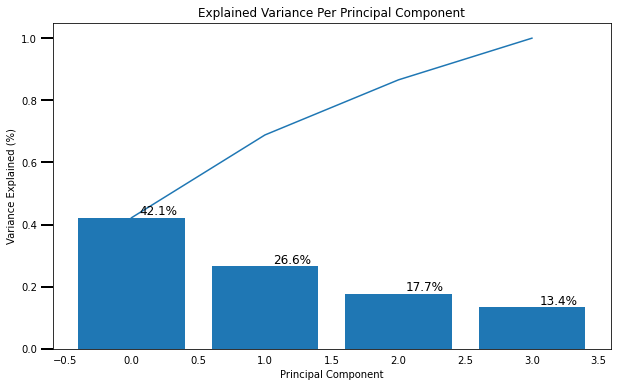

In [149]:
def pca_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

pca_plot(pca)

In [150]:
#Create sparse matrices to run the scikit multilearn algorithms

X_train_pca = lil_matrix(X_train_pca).toarray()
y_train = lil_matrix(y_train).toarray()
X_test_pca = lil_matrix(X_test_pca).toarray()
y_test = lil_matrix(y_test).toarray()

In [151]:
#MODEL Model Applications////////////////////////////////////////////////////////////////////////////////////////////////////////

In [152]:
# using binary relevance
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

BR_classifier = BinaryRelevance(GaussianNB())
# train
BR_classifier.fit(X_train, y_train)
# predict
predictions = BR_classifier.predict(X_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))


Accuracy =  0.014285714285714285
--- Run time: 0.0 mins ---


In [153]:
# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

CC_classifier = ClassifierChain(GaussianNB())

# train
CC_classifier.fit(X_train, y_train)

# predict
predictions = CC_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.010714285714285714
--- Run time: 0.01 mins ---


In [154]:
# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

LP_classifier = LabelPowerset(GaussianNB())

# train
LP_classifier.fit(X_train, y_train)

# predict
predictions = LP_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.060714285714285714
--- Run time: 0.0 mins ---


In [157]:
start_time = time.time()

MLKNN_classifier = MLkNN(k=17)

# train
MLKNN_classifier.fit(X_train_pca, y_train)

# predict mlknn =3
predictions = MLKNN_classifier.predict(X_test_pca)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=17 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Accuracy =  0.0035714285714285713
--- Run time: 0.09 mins ---


In [44]:
#This is takes a long time to run
#Find the optimal set of parameters

start_time = time.time()

parameters = {'k': range(1,50), 's': [0.5, 0.7, 1.0]}

score = 'accuracy'


clf = GridSearchCV(MLkNN(), parameters, scoring=score, cv=5)
clf.fit(X_train_pca, y_train)

print (clf.best_params_, clf.best_score_)
print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=11 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=11 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=11 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=11 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=13 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=15 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=17 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=17 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=17 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=17 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=19 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=19 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=19 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=19 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=21 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=21 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=21 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=21 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=23 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=23 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=23 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=23 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=26 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=27 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=27 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=28 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=28 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=29 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=30 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=30 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=30 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=32 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=32 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=32 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=32 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=34 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=34 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=34 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=34 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=36 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=36 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=36 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=36 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=38 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=38 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=38 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=38 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=40 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=40 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=40 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=40 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=42 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=42 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=42 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=42 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=44 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=44 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=44 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=44 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=46 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=46 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=46 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=46 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=48 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=48 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=48 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=48 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

{'k': 1, 's': 0.5} 0.025862307993149113
--- Run time: 775.16 mins ---
